In [25]:
# !IMPORTANT - to run this notebook download first train_and_test2.csv dataset from https://www.kaggle.com/datasets/heptapod/titanic and put it in same folder as for this notebook

# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import .csv data into DataFrame
patients = pd.read_csv('cancer_patient_data_sets.csv')
patients.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


<Axes: >

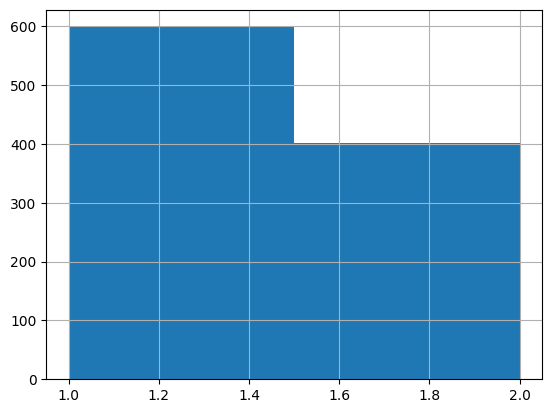

In [3]:
# Gender distribution
patients['Gender'].hist(bins= 2) 

<Axes: >

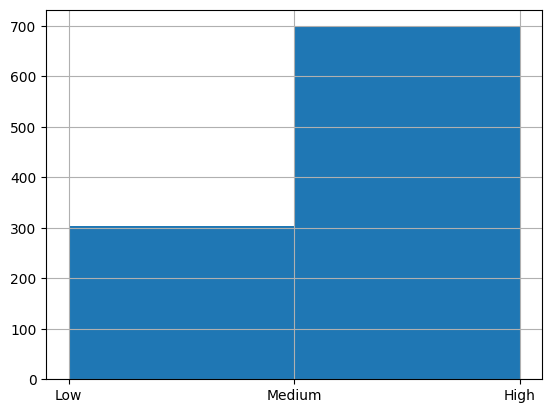

In [4]:
# distribution of "survived"
patients['Level'].hist(bins=2) 

<Axes: >

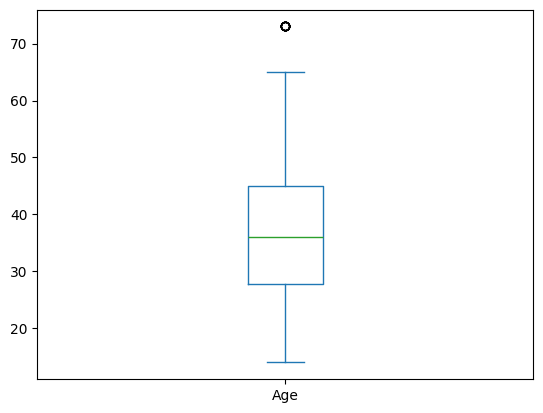

In [5]:
# distribution of Age
patients['Age'].plot.box() 

In [6]:
# removed empty columns and not needed 
patients.drop(['index', 'Patient Id','Gender','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Chest Pain','Coughing of Blood','Fatigue','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails','Frequent Cold','Dry Cough','Snoring'], axis=1, inplace = True)
patients

,Age,Air Pollution,Alcohol use,Obesity,Smoking,Passive Smoker,Weight Loss,Level
0,33,2,4,4,3,2,4,Low
1,17,3,1,2,2,4,3,Medium
2,35,4,5,7,2,3,7,High
3,37,7,7,7,7,7,2,High
4,46,6,8,7,8,7,2,High
...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,8,3,High
996,37,6,8,7,7,8,6,High
997,25,4,5,7,2,3,7,High
998,18,6,8,7,8,7,2,High


In [7]:
# fill missing values
patients.fillna(patients.mean(), inplace=True)
passengersCopy = patients.copy()
patients['Level']

C:\Users\marek\AppData\Local\Temp\ipykernel_19568\537121691.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  patients.fillna(patients.mean(), inplace=True)


0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

In [27]:
#what if some of columns were categorical instead numeric? 
# maps = {
#     0: 'Low',
#     1: 'Medium',
#     2: 'High'
# }
# patients['Level'] = patients['Level'].apply(lambda x: maps[x])
# print(patients)

###################################################################

maps = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}
patients['Level'] = patients['Level'].apply(lambda x: maps[x])

patients

KeyError: 0

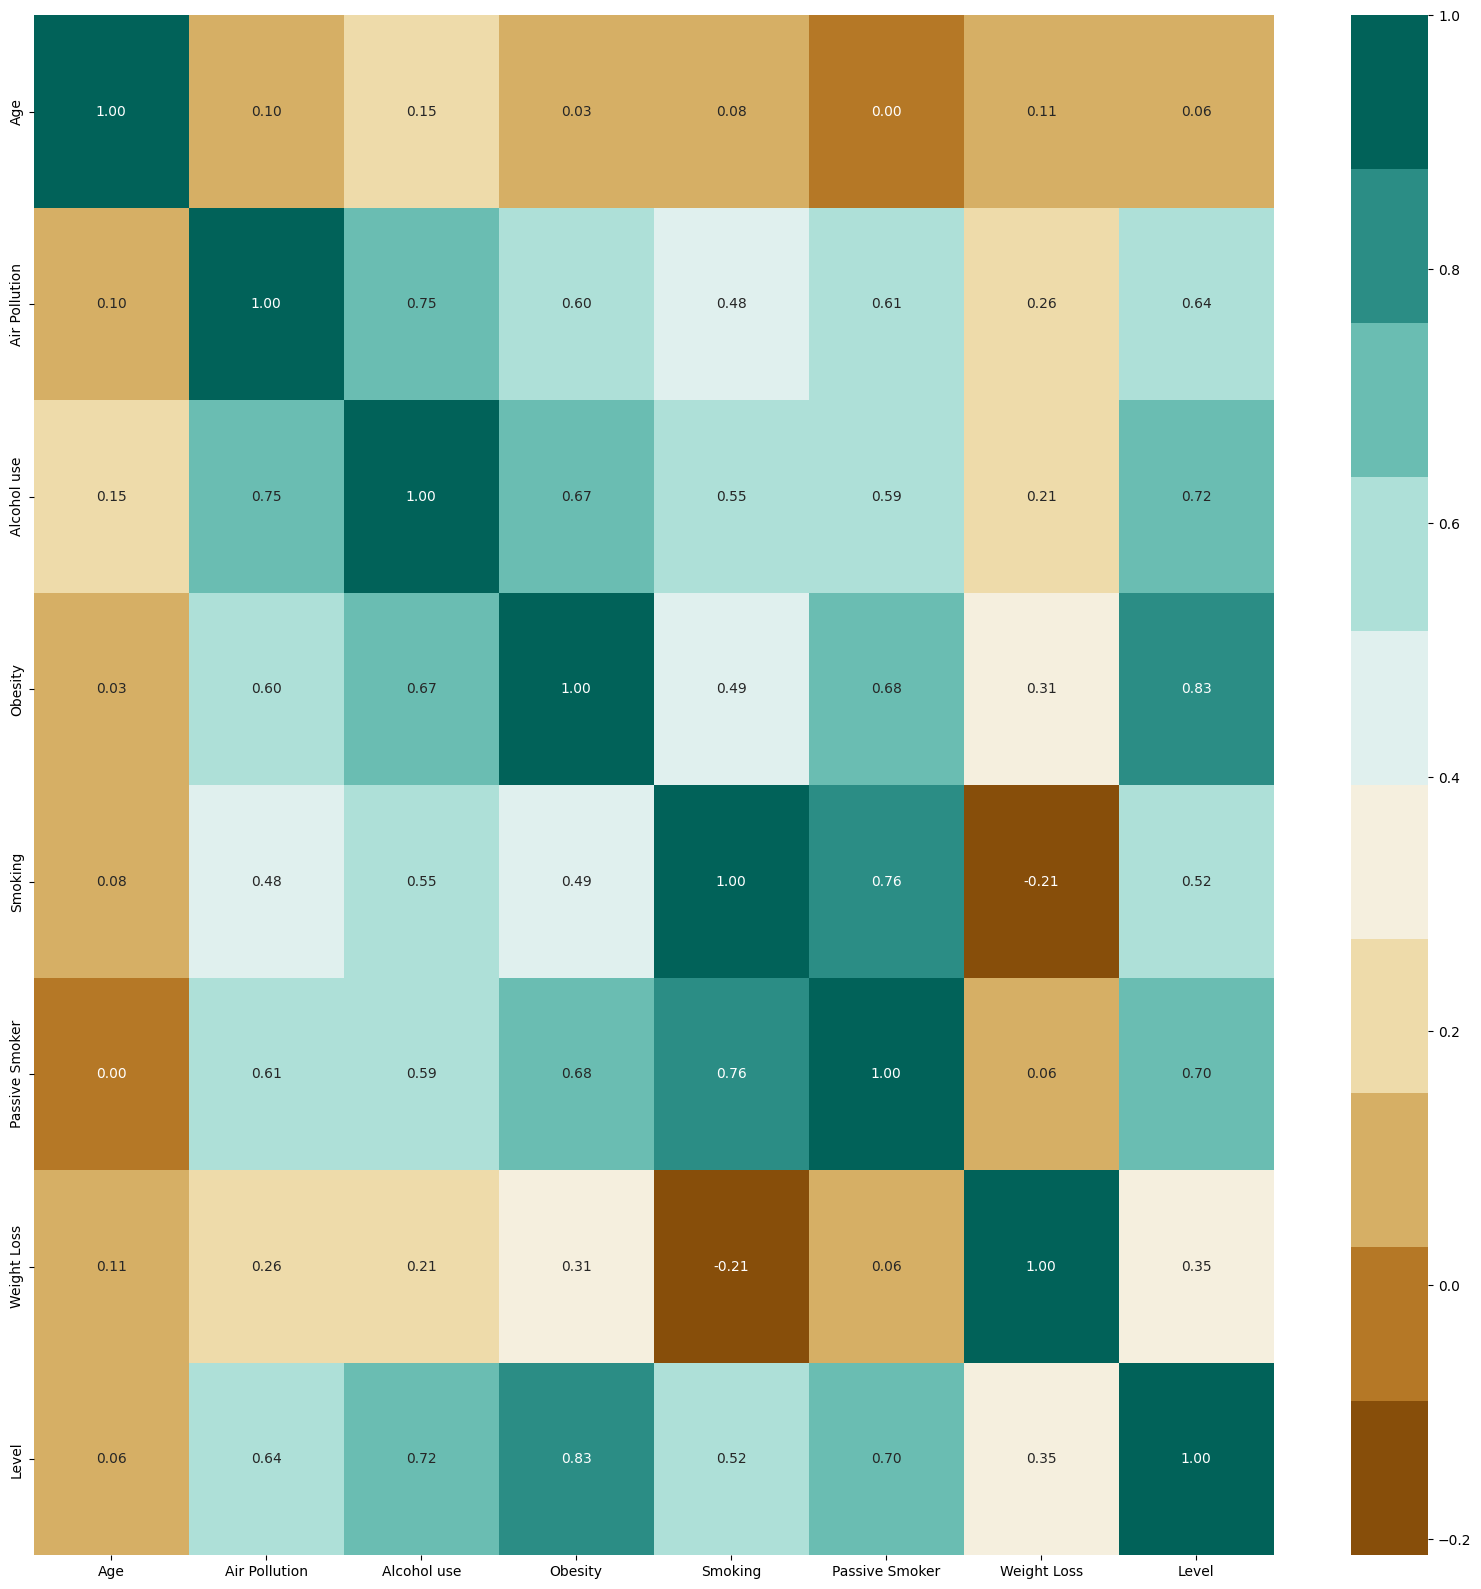

In [9]:
# generate correlation matrix

correlations = patients.corr()
fig, ax = plt.subplots(figsize=(20, 20))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(patients.columns)

plt.show()

# columns meanings:
# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
# create training set
X = patients.drop('Level', axis=1).to_numpy()
X

array([[33,  2,  4, ...,  3,  2,  4],
       [17,  3,  1, ...,  2,  4,  3],
       [35,  4,  5, ...,  2,  3,  7],
       ...,
       [25,  4,  5, ...,  2,  3,  7],
       [18,  6,  8, ...,  8,  7,  2],
       [47,  6,  5, ...,  2,  3,  7]], dtype=int64)

In [11]:
# create labels for training set
y = patients.loc[:, 'Level'].to_numpy()
y

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
# split data for training model and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345) 

In [13]:
# universal method for training and evaluation of models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [14]:
# MODEL 1 - logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.8676470588235294, 0.7375, 0.7972972972972973, 0.845]


c:\Users\marek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.8970588235294118, 0.7625, 0.8243243243243242, 0.785]


In [16]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [1.0, 1.0, 1.0, 1.0]


<Axes: >

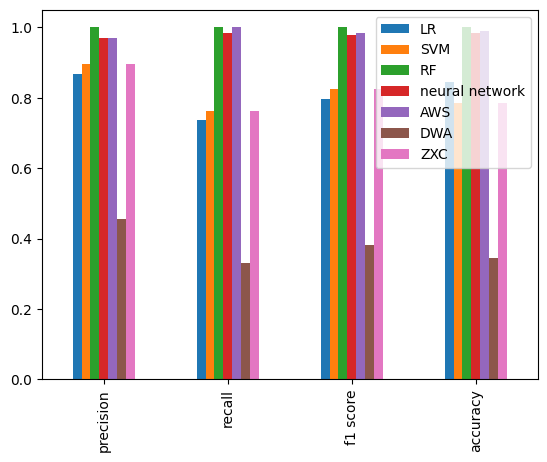

In [24]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [18]:
# corrections and adjustments - use artificial neural network

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.9705882352941176, 0.9850746268656716, 0.9777777777777777, 0.985]


In [19]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [23]:
# corrections and adjustments - use different hyperparameters

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.9705882352941176, 1.0, 0.9850746268656716, 0.99]
SVM kernel='sigmoid' [0.45588235294117646, 0.32978723404255317, 0.3827160493827161, 0.345]
SVM degree=4 [0.8970588235294118, 0.7625, 0.8243243243243242, 0.785]


c:\Users\marek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
